# Sorting accuracy

TODO:
- no fitted noise

### Setup

In [1]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies

# BUCCINO 2020
EXPERIMENT = "buccino_2020"
SIMULATION_DATE = "2020"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
BUCCI_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
BUCCI_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

# npx-384-40KHz (to maximize sorting accuracy see SUPP. FIG)
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_10_18"
data_conf_marques, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
KS3_SORTING_PATH_marques = data_conf_marques["sorting"]["sorters"]["kilosort3"]["output"]
GT_SORTING_PATH_marques = data_conf_marques["sorting"]["simulation"]["ground_truth"]["output"]

# npx-384-40KHz (to maximize sorting accuracy see SUPP. FIG)
data_conf_stim, _ = get_config("silico_neuropixels", "stimulus").values()
KS3_SORTING_PATH_stim = data_conf_stim["sorting"]["sorters"]["kilosort3"]["output"]
GT_SORTING_PATH_stim = data_conf_stim["sorting"]["simulation"]["ground_truth"]["output"]


# FIGURE SETTINGS
COLOR_VIVO = (0.7, 0.7, 0.7)
COLOR_SILI = (0.84, 0.27, 0.2)
COLOR_STIM = (0.6, 0.75, 0.1)
COLOR_BUCCI = (0.13, 0.50, 1)
MARKERSIZE = 3
BOX_ASPECT = 1                  # square fig
FIG_SIZE = (4,4)
N_MAJOR_TICKS = 6
N_MINOR_TICKS = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.major.width'] = 1
legend_cfg = {"frameon": False, "handletextpad": 0.1}
savefig_cfg = {"transparent":True}
# print(plt.rcParams.keys())

2024-01-30 16:01:34,726 - root - utils.py - get_config - INFO - Reading experiment config.
2024-01-30 16:01:34,735 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-01-30 16:01:34,736 - root - utils.py - get_config - INFO - Reading experiment config.
2024-01-30 16:01:34,753 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-01-30 16:01:34,768 - root - utils.py - get_config - INFO - Reading experiment config.
2024-01-30 16:01:34,786 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Compute sorting accuracy

In [3]:
# takes 5 min

# get buccino accuracies
bucci_accuracies = get_sorting_accuracies(BUCCI_GT_SORTING_PATH, BUCCI_KS3_SORTING_PATH)
bucci_acc_array = np.array(bucci_accuracies)

# get silico marques accuracies
accuracies_marques = np.array(
    get_sorting_accuracies(GT_SORTING_PATH_marques, KS3_SORTING_PATH_marques)
)

# get silico marques stimulus accuracies
accuracies_stim = np.array(
    get_sorting_accuracies(GT_SORTING_PATH_stim, KS3_SORTING_PATH_stim)
)

### Plot

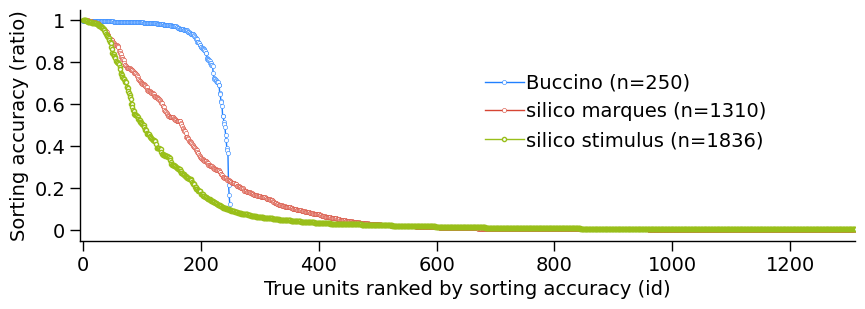

In [5]:
# count units
n_units = max([len(accuracies_marques), len(bucci_accuracies)])

# plot accuracy (agreement score)
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

# plot
ax.plot(
    bucci_acc_array,
    label=f"Buccino (n={len(bucci_acc_array)})",
    linestyle="-",
    marker="o",
    markerfacecolor="w",
    color=COLOR_BUCCI,
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
)

ax.plot(
    np.array(accuracies_marques),
    label=f"silico marques (n={len(accuracies_marques)})",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=COLOR_SILI,
    color=COLOR_SILI,
    linestyle="-",
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
)

ax.plot(
    np.array(accuracies_stim),
    label=f"silico stimulus (n={len(accuracies_stim)})",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=COLOR_STIM,
    color=COLOR_STIM,
    linestyle="-",
    markersize=MARKERSIZE,
    markeredgewidth=1,
)

# add legend
ax.set_ylabel("Sorting accuracy (ratio)")
ax.set_xlabel("True units ranked by sorting accuracy (id)")
ax.set_xlim([-5, n_units])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.legend(loc="upper left", bbox_to_anchor=(0.5, 0.8), **legend_cfg)

# save figures
# plt.savefig("figures/3_accuracy/pdf/unit_accuracies.pdf")
# plt.savefig("figures/3_accuracy/svg/unit_accuracies.svg")

In [12]:
DET_THRESH = 0.8

print(sum(accuracies_marques >= DET_THRESH))
print(sum(accuracies_marques >= DET_THRESH) / len(accuracies_marques))

70
0.05343511450381679


In [13]:
print(sum(accuracies_stim >= DET_THRESH))
print(sum(accuracies_stim >= DET_THRESH) / len(accuracies_stim))

59
0.03213507625272331
